In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ## In case of using other crimes:
# df = pd.read_pickle('./Data/INQ_DATA.pkl')
# #creat a series of other crimes
# corruption = df.loc[(df['offences'].str.contains( 'corrup',case = False) ==True) & ((df['offences'].str.contains( 'ativa',case = False) ==True) | (df['offences'].str.contains( 'passiv',case = False) ==True)) ]
# corruption.to_pickle('./Data/Corruption.pkl')

In [2]:
!pip install  -U statsmodels

In [3]:
!mkdir Data
!mkdir Plottings
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl

mkdir: cannot create directory ‘Data’: File exists
mkdir: cannot create directory ‘Plottings’: File exists
--2022-04-05 14:38:00--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979226 (956K) [application/octet-stream]
Saving to: ‘Corruption.pkl.1’

Corruption.pkl.1    100%[===================>] 956.28K  --.-KB/s    in 0.06s   

2022-04-05 14:38:00 (14.7 MB/s) - ‘Corruption.pkl.1’ saved [979226/979226]



In [4]:
df_corruption = pd.read_pickle('./Corruption.pkl')

In [5]:
!mkdir Plottings

mkdir: cannot create directory ‘Plottings’: File exists


In [6]:
df_corruption

,offences,region,title
date,,,
2009-11-03,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,11.03.2009 - INQ 0007031-39.2014.4.01.3000 (JF...
2009-12-18,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,18.12.2009 - INQ 0015790-31.2010.4.01.3000 (JF...
2010-06-29,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,"29.06.2010 - INQ 00181/2010 (DPF/AC), PR-AC"
2010-07-10,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,07.10.2010 - INQ 0002501-94.2011.4.01.3000 (JF...
2009-03-02,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AL,"03.02.2009 - INQ 2009.80.00.001342-8 (JF-AL, 7..."
...,...,...,...
2014-03-09,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",AL,03.09.2014 - INQ 0000077-93.2017.4.05.8000 (JF...
2014-05-27,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",MA,"27.05.2014 - INQ 00078/2014 (DPF/CAX), PRM-CAX..."
2014-03-18,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",RN,18.03.2014 - IPL 0000544-41.2014.4.05.8400 (JF...


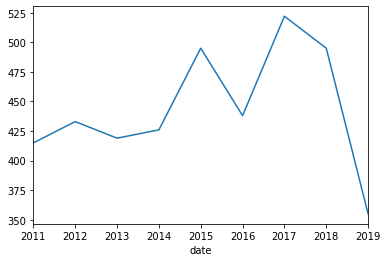

In [7]:
# Used the .sort_index() just to get rid off the deprecation warning
df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()

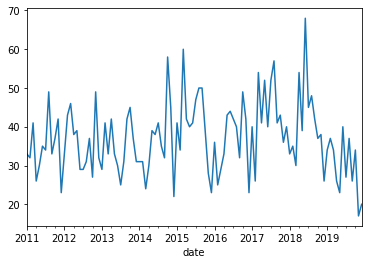

In [8]:
df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()

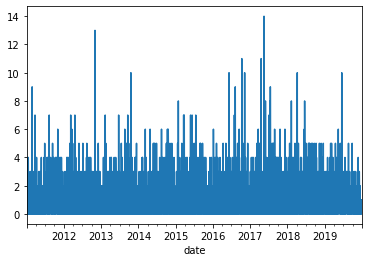

In [9]:
df_corruption.sort_index()['2011':'2019'].resample('D').title.count().plot()

In [10]:
states = pd.unique(df_corruption['region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


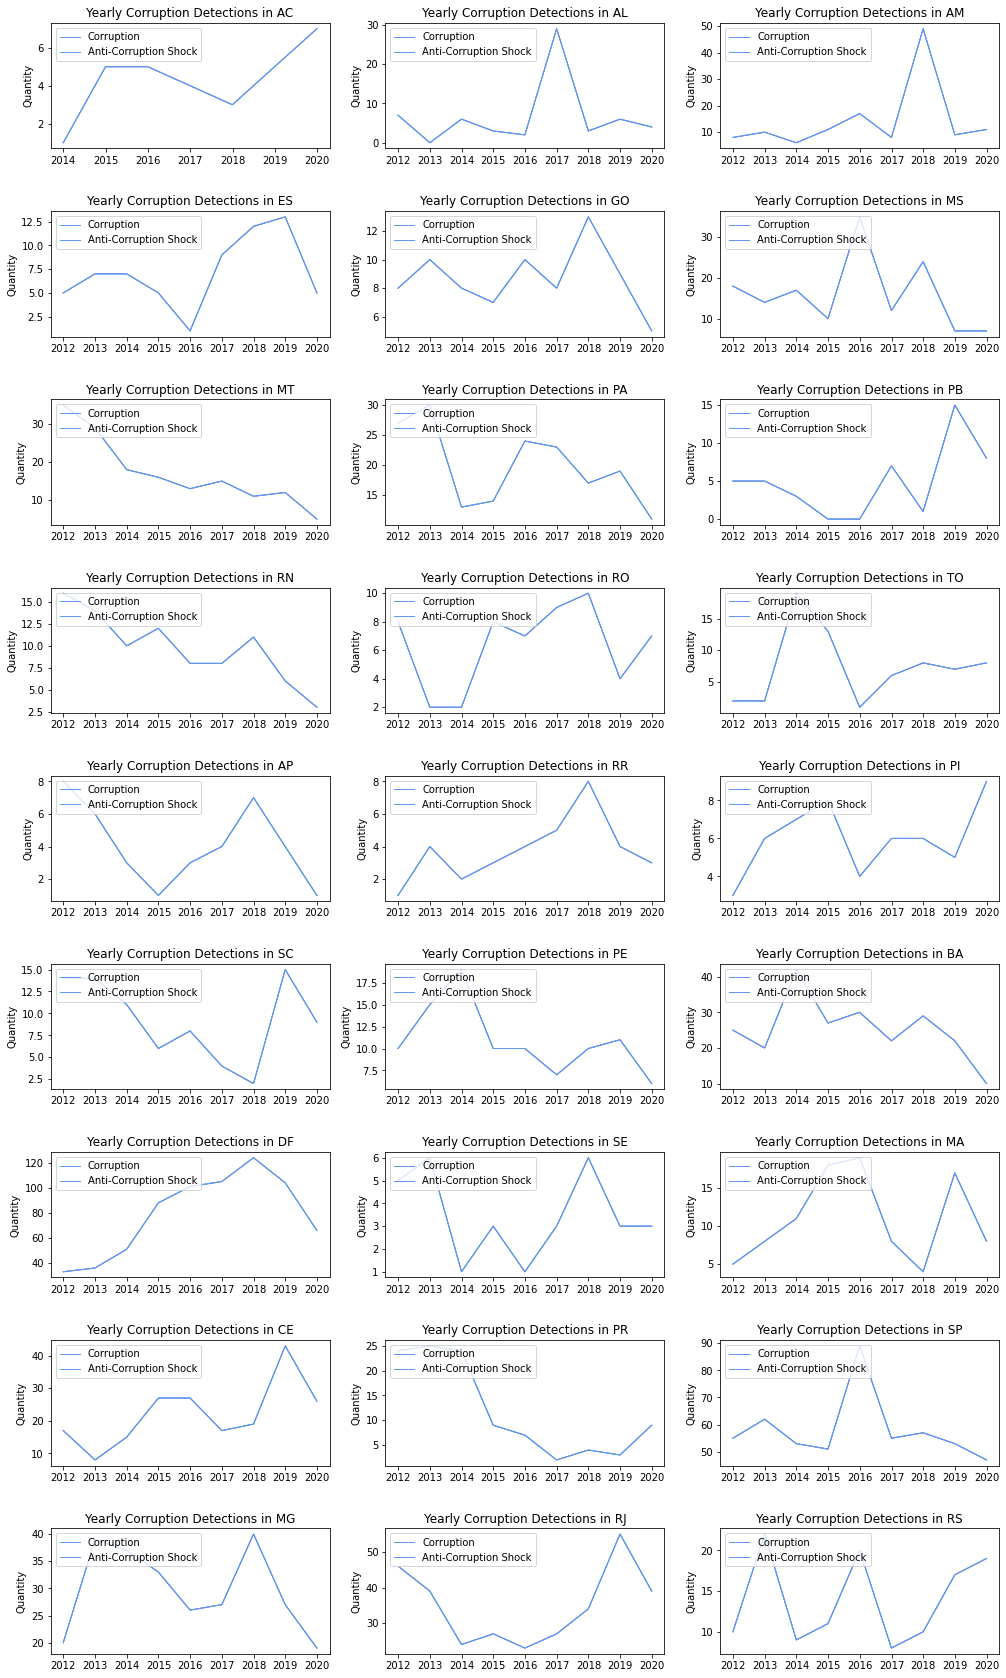

In [11]:
fig = plt.figure(figsize=(17,30))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(0,len(states),1):
    plt.subplot((len(states)/3),3,i+1)
    plt.plot((df_corruption['2011':'2019'].loc[df_corruption['2011':'2019']['region'].str.contains(states[i]) ==True].resample('Y').count()),color = 'cornflowerblue', lw = 1)
    #plt.axvline('2013', color='red', lw=1, alpha=1)  
    plt.legend(('Corruption','Anti-Corruption Shock'),loc=2)
    #plt.xlabel('Years')
    plt.ylabel('Quantity')
    plt.title('Yearly Corruption Detections in ' + states[i])
plt.show()
fig.savefig('./Plottings/states.pdf', transparent= True)

# Empirical Strategy

1 - Based on Miller (2009), I'll try to fit a polinomial curve after the relevant schok.
2 - Try different regression discontinuities: one after the schock , other after the 'clean up'. 
3 - Run the data searching for 'chow-like' breaks on the trend.

## 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the Brazilian Federal Police of initiated investigations of corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2009; and 

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of initiated investigations for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [12]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

!pip install Stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [13]:
#Yearly Variables
#Creating the yearly dataframe 
ydf = df_corruption['2011':'2019'].resample('Y').count()

ydf['cons'] = 1 


# creat a dummy with 0 before 2013 and 1 after #
dummy = []   
for i in (range(2010,2019)):
    if i < 2014:
        dummy.append(0)
    else:
        dummy.append(1)
        
ydf['dummy'] = dummy
ydf['year'] = range(2011,2020,1)
# creat a list of 1 to 10#
yt1 = list(range(1,10)) 

ydf['t1'] = yt1


# creat a polynomial root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2010,2019)):
    if i < 2015:
        yt2.append(0)
    else:
        yt2.append(i-2015)
ydf['t2'] = yt2
        
# Creating the higher order polynoms       
             
ydf['s1'] = np.power(yt1,2)
ydf['c1'] = np.power(yt1,3)
ydf['s2'] = np.power(yt2,2)
ydf['c2'] = np.power(yt2,3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
ydf.head(20)

,offences,region,title,cons,dummy,year,t1,t2,s1,c1,s2,c2
date,,,,,,,,,,,,
2011-12-31,415,415,415,1,0,2011,1,0,1,1,0,0
2012-12-31,433,433,433,1,0,2012,2,0,4,8,0,0
2013-12-31,419,419,419,1,0,2013,3,0,9,27,0,0
2014-12-31,426,426,426,1,0,2014,4,0,16,64,0,0
2015-12-31,495,495,495,1,1,2015,5,0,25,125,0,0
2016-12-31,438,438,438,1,1,2016,6,0,36,216,0,0
2017-12-31,522,522,522,1,1,2017,7,1,49,343,1,1
2018-12-31,495,495,495,1,1,2018,8,2,64,512,4,8
2019-12-31,355,355,355,1,1,2019,9,3,81,729,9,27


In [15]:
#CORRUPTION ONLY
results1 = sm.OLS(ydf['offences'], ydf[['cons','dummy']]).fit()
results2 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2']]).fit()
results3 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s1','s2']]).fit()
results4 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s1','s2','c1','c2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t1','t2','s1','s2','c1','c2'])
HTML(stargazer.render_html())

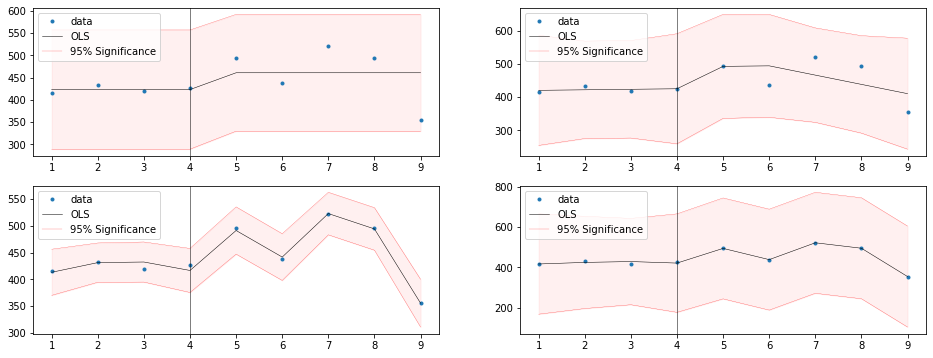

In [16]:

fig = plt.figure(figsize=(16,6))

result_list = [results1,results2,results3,results4]
theta = 4

for i in range(len(result_list)):
  plt.subplot(2,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ydf['t1'], ydf['offences'], '.',lw=1)
  plt.plot(ydf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ydf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ydf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ydf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

fig.savefig('emp3.pdf')

In [17]:
#Monthly

mdf = df_corruption['2011':'2019'].resample('M').count()

#create a constant

mdf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x months) and 1 after # Change this to better fit###
intervention = 42

dummy = []    
for i in (range(0,len(mdf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)
        
mdf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(mdf)))  

mdf['t1'] = t1

# creat a polynom root after 2013#
t2= []                  
for i in (range(0,len(mdf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)
        
mdf['t2'] = t2

#Creating other orther polynomials
        
mdf['s1'] = np.power(t1,2)
mdf['c1'] = np.power(t1,3)
mdf['s2'] = np.power(t2,2)
mdf['c2'] = np.power(t2,3)
mdf['q1'] = np.power(t1,4)
mdf['f1'] = np.power(t1,5)
mdf['q2'] = np.power(t2,4)
mdf['f2'] = np.power(t2,5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
mdf.head(5)

,offences,region,title,cons,dummy,t1,t2,s1,c1,s2,c2,q1,f1,q2,f2
date,,,,,,,,,,,,,,,
2011-01-31,33,33,33,1,0,0,0,0,0,0,0,0,0,0,0
2011-02-28,32,32,32,1,0,1,0,1,1,0,0,1,1,0,0
2011-03-31,41,41,41,1,0,2,0,4,8,0,0,16,32,0,0
2011-04-30,26,26,26,1,0,3,0,9,27,0,0,81,243,0,0
2011-05-31,30,30,30,1,0,4,0,16,64,0,0,256,1024,0,0


In [19]:
#  Corruption 
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2'])
HTML(stargazer.render_html())

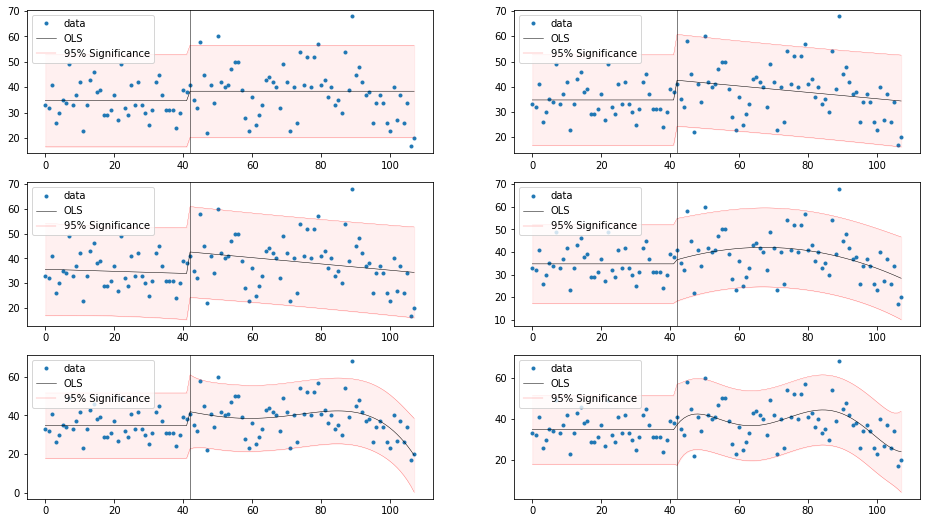

In [20]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

fig.savefig('emp3.pdf')

# Multivariable Regressions

Adding, GDP growth, Unemployment rate and onther variables.

Adding state fixed effects.

In [21]:
#Download the data from my Github Repo
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/interest_rate.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/IPCA.csv

--2022-04-05 14:38:20--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2117 (2.1K) [text/plain]
Saving to: ‘GDP.csv.2’

GDP.csv.2           100%[===================>]   2.07K  --.-KB/s    in 0s      

2022-04-05 14:38:21 (19.3 MB/s) - ‘GDP.csv.2’ saved [2117/2117]

--2022-04-05 14:38:21--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2362 (2.3K) [text/plain]
Saving to: ‘unem

In [22]:
# CSV dowloaded from 'ipeadata.gov.br' *Fonte: IPEA * Last trim expected
tgdp = pd.read_csv('./GDP.csv')

tgdp = tgdp.rename(columns={ 'PIB - preços de mercado - var. real trim. - (%) - Instituto Brasileiro de Geografia e Estatística- Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMG104': 'gdp'})
tgdp = pd.DataFrame(tgdp)
#dropting uncessary columns
tgdp = tgdp.drop(['Data'],1)

tgdp = tgdp/100
#creating the date column in datetime format:
tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')

#setting a date index:
tgdp = tgdp.set_index('date')


#Arranging the data to fit Multivariate Monthly regression:
# taking average of quarterly growth to monthly observations: (other possible method is .pad() insted of .bfill())
mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M', closed = 'left').bfill()

mdf['gdp'] = mdf['gdp'].fillna( 'bfill')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [23]:
# CSV dowloaded from 'ipeadata.gov.br' IBGE PNAD -CORREC FOR BEFORE 2012 from SEAD
unemployment = pd.read_csv('./unemployment2.csv')

unemployment = unemployment.rename(columns={ 'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12': 'unemployment'})
unemployment = pd.DataFrame(unemployment)
#dropting uncessary columns
unemployment = unemployment.drop(['Unnamed: 2','Data'],1)

unemplyment = unemployment/100
#creating the date column in datetime format:
unemployment['date'] = pd.date_range('2009','2020', freq='M')

#setting a date index:
unemployment = unemployment.set_index('date')

mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [24]:
# CSV dowloaded from 'ipeadata.gov.br'
interest = pd.read_csv('./interest_rate.csv')

interest = interest.rename(columns={ 'Taxa de juros - Over / Selic - (% a.m.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12': 'interest'})
interest = pd.DataFrame(interest)
#dropting uncessary columns
interest = interest.drop(['Unnamed: 2','Data'],1)
interes = interest/100

#creating the date column in datetime format:
interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')

#setting a date index:
interest = interest.set_index('date')

mdf['interest'] = interest['2009':'2020'].resample('M').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [25]:
# CSV dowloaded from 'ipeadata.gov.br'
inflation = pd.read_csv('./IPCA.csv')

inflation = inflation.rename(columns={ 'Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12': 'interest'})
inflation = pd.DataFrame(inflation)
#dropting uncessary columns
inflation = inflation.drop(['Unnamed: 2','Data'],1)
inflation = inflation/100

#creating the date column in datetime format:
inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')

#setting a date index:
inflation = inflation.set_index('date')

mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [26]:
mdf['real_interest'] = mdf['inflation']*(mdf['interest']+1)

In [27]:
#regressing

results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

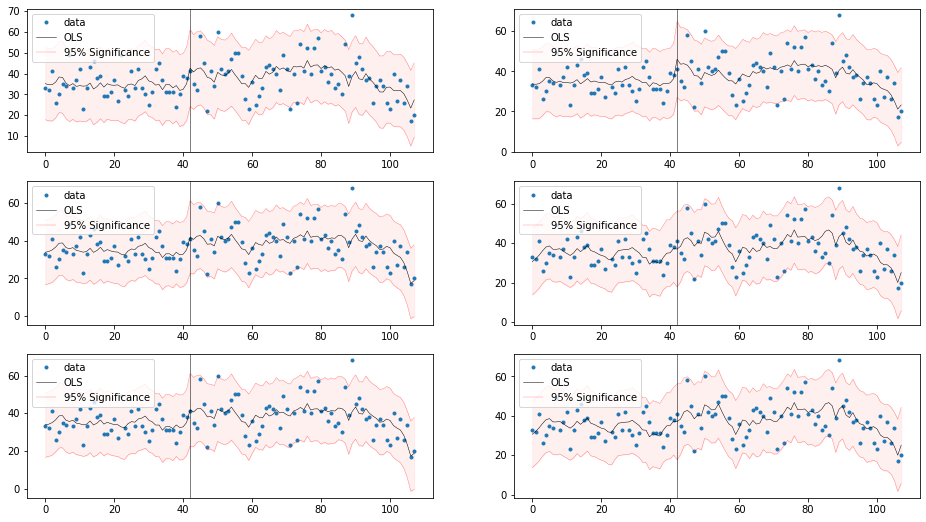

In [28]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

fig.savefig('emp3.pdf')

In [29]:
#  Corruption 
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t2','s2'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.789512
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.743470
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.742067
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.677123
         Iterations 9


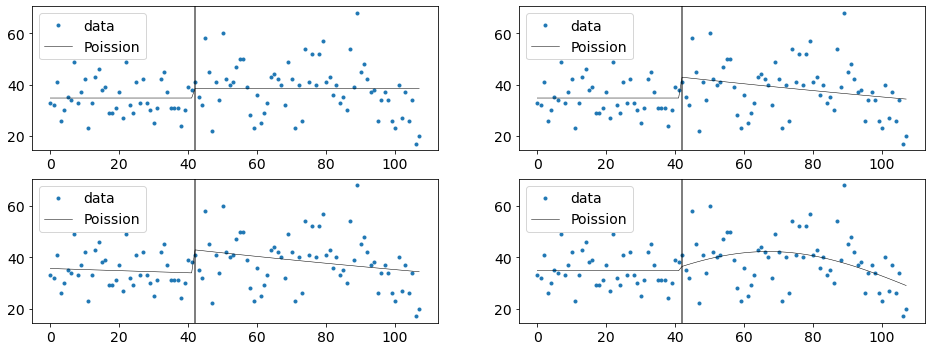

In [41]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.axvline(theta, color='black', lw=2, alpha=0.5)
  plt.legend(('data','Poission'),loc=2)

plt.show()

In [32]:
#  Corruption 
results1 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t2','s2'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.593722
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 3.571535
         Iterations: 14
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 3.570826
         Iterations: 16
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 4.647458
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


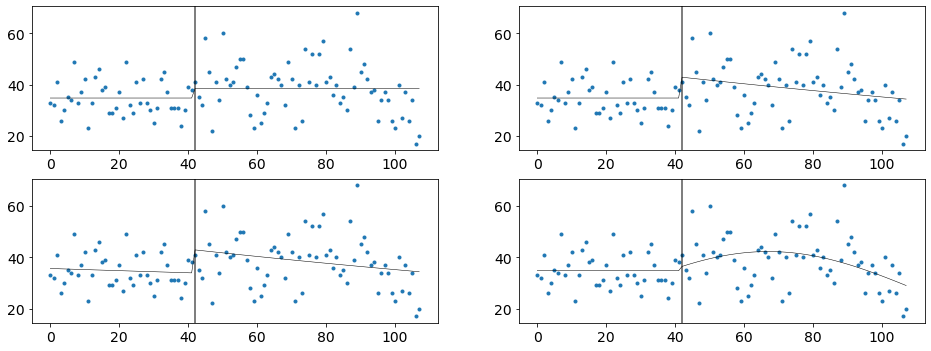

In [40]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.axvline(theta, color='black', lw=2, alpha=0.5)
 # plt.legend(('data','OLS'),loc=2)

plt.show()

In [31]:
import pylab
import seaborn as sns


pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)



In [54]:
smoothed = sm.nonparametric.lowess(exog=mdf['t1'], endog= mdf['offences'], frac=0.2)

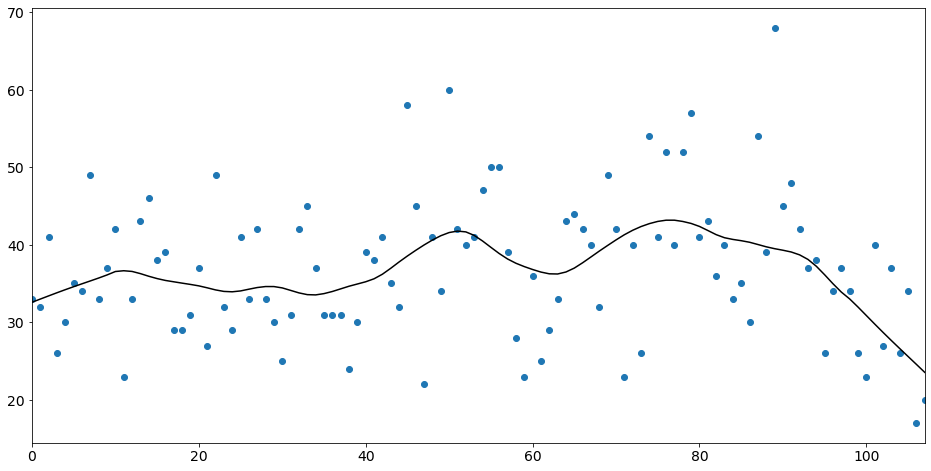

In [55]:
# Plot the fit line
fig, ax = pylab.subplots()

ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

In [56]:
# Now create a bootstrap confidence interval around the a LOWESS fit


def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top


# Compute the 95% confidence interval
eval_x = np.linspace(0, 107, 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    mdf['t1'], mdf['offences'], eval_x, lowess_kw={"frac": 0.1}
)

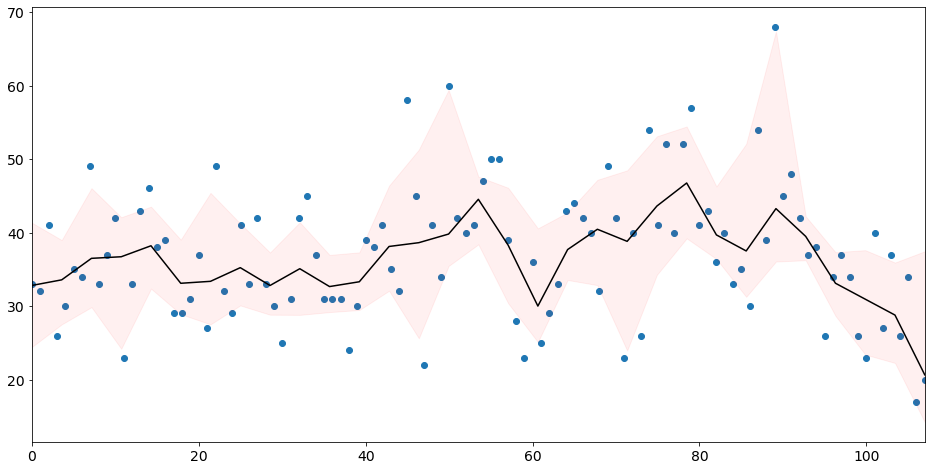

In [59]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(eval_x, smoothed, c="k")
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
pylab.autoscale(enable=True, axis="x", tight=True)